In [2]:
import pandas as pd
import numpy as np

In [3]:
rocket_df = pd.read_csv('./data/RocketLaunchDataCSV.csv')
df = rocket_df.copy()
df.sample(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
113,NaN,04-Jan-99,NaN,Cape Canaveral,NaN,NaN,57.0,43.0,50.82,NaN,...,17.0,10.0,NaN,NaN,NaN,30.29,NaN,10:25,Fair,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24,Partly Cloudy,NaN
57,Surveyor 1,30-May-66,15:41,Cape Canaveral,Uncrewed,Y,85.0,66.0,77.83,84.0,...,17.0,10.0,6.0,NaN,NaN,29.99,NaN,13:47,Partly Cloudy,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

In [5]:
df.isnull().sum()

Name                            240
Date                              0
Time (East Coast)               241
Location                          0
Crewed or Uncrewed              240
Launched?                       240
High Temp                         1
Low Temp                          1
Ave Temp                          1
Temp at Launch Time             241
Hist High Temp                    1
Hist Low Temp                     1
Hist Ave Temp                     1
Percipitation at Launch Time      1
Hist Ave Percipitation            1
Wind Direction                    1
Max Wind Speed                    1
Visibility                        1
Wind Speed at Launch Time       241
Hist Ave Max Wind Speed         300
Hist Ave Visibility             300
Sea Level Pressure                1
Hist Ave Sea Level Pressure     300
Day Length                        2
Condition                         2
Notes                           297
dtype: int64

In [6]:
df['Launched?'].fillna('N', inplace=True)
df['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
df['Wind Direction'].fillna('unknown',inplace=True)
df['Condition'].fillna('Fair',inplace=True)

/tmp/ipykernel_5421/3815488402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Launched?'].fillna('N', inplace=True)
/tmp/ipykernel_5421/3815488402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:
df['Launched?'].value_counts()

Launched?
N    241
Y     59
Name: count, dtype: int64

In [8]:
df.drop(['Name','Date','Time (East Coast)','Location','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed', 'Temp at Launch Time', 'Wind Speed at Launch Time'],axis=1, inplace=True)
df.dropna(inplace=True)
df

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,Uncrewed,N,75.0,68.0,71.00,75.0,55.0,65.0,0.00,0.08,E,16.0,15.0,Cloudy
1,Uncrewed,N,78.0,70.0,73.39,75.0,55.0,65.0,0.00,0.09,E,14.0,10.0,Cloudy
2,Uncrewed,Y,73.0,0.0,60.21,75.0,55.0,65.0,0.00,0.09,NE,15.0,10.0,Cloudy
3,Uncrewed,N,76.0,57.0,66.04,75.0,55.0,65.0,0.00,0.08,N,10.0,10.0,Partly Cloudy
4,Uncrewed,N,79.0,60.0,70.52,75.0,55.0,65.0,0.00,0.09,E,12.0,10.0,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Uncrewed,N,87.0,71.0,79.36,87.0,70.0,79.0,0.00,0.15,S,20.0,10.0,Thunder
296,Uncrewed,N,86.0,72.0,79.50,88.0,70.0,79.0,0.01,0.16,SE,18.0,10.0,Fair
297,Crewed,Y,87.0,75.0,79.69,88.0,70.0,79.0,0.00,0.16,SE,16.0,10.0,Fair
298,Uncrewed,N,87.0,72.0,79.70,88.0,70.0,79.0,0.46,0.16,E,13.0,10.0,Cloudy


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Crewed or Uncrewed'] = label_encoder.fit_transform(df['Crewed or Uncrewed'])
df['Wind Direction'] = label_encoder.fit_transform(df['Wind Direction'])
df['Condition'] = label_encoder.fit_transform(df['Condition'])

In [10]:
df.head(3)

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,1,N,75.0,68.0,71.00,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,0
1,1,N,78.0,70.0,73.39,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,0
2,1,Y,73.0,0.0,60.21,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,0


In [11]:
X = df.drop(columns='Launched?', axis=1)
y = df['Launched?']

In [12]:
X

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,1,75.0,68.0,71.00,75.0,55.0,65.0,0.00,0.08,0,16.0,15.0,0
1,1,78.0,70.0,73.39,75.0,55.0,65.0,0.00,0.09,0,14.0,10.0,0
2,1,73.0,0.0,60.21,75.0,55.0,65.0,0.00,0.09,2,15.0,10.0,0
3,1,76.0,57.0,66.04,75.0,55.0,65.0,0.00,0.08,1,10.0,10.0,6
4,1,79.0,60.0,70.52,75.0,55.0,65.0,0.00,0.09,0,12.0,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,87.0,71.0,79.36,87.0,70.0,79.0,0.00,0.15,4,20.0,10.0,9
296,1,86.0,72.0,79.50,88.0,70.0,79.0,0.01,0.16,5,18.0,10.0,1
297,0,87.0,75.0,79.69,88.0,70.0,79.0,0.00,0.16,5,16.0,10.0,1
298,1,87.0,72.0,79.70,88.0,70.0,79.0,0.46,0.16,0,13.0,10.0,0


In [13]:
print(X.info());print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            299 non-null    int64  
 1   High Temp                     299 non-null    float64
 2   Low Temp                      299 non-null    float64
 3   Ave Temp                      299 non-null    float64
 4   Hist High Temp                299 non-null    float64
 5   Hist Low Temp                 299 non-null    float64
 6   Hist Ave Temp                 299 non-null    float64
 7   Percipitation at Launch Time  299 non-null    float64
 8   Hist Ave Percipitation        299 non-null    float64
 9   Wind Direction                299 non-null    int64  
 10  Max Wind Speed                299 non-null    float64
 11  Visibility                    299 non-null    float64
 12  Condition                     299 non-null    int64  
dtypes: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 13), (60, 13), (239,), (60,))

### 의사결정 나무

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [37]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [ ]:
# !pip install graphviz pydotplus
# #graphviz 설치
# !sudo apt-get update
# !sudo apt-get  install -y graphviz

In [23]:
from IPython.display import Image# for visualizing the tree
import pydotplus
 
# 의사 결정 나무를 시각화하기 위해서 라이브러리를 임포트합니다.
from sklearn.tree import export_graphviz

In [24]:
# 시각화를 위한 함수를 작성한다.
def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    print(graph)
    graph.write_png(png_file_to_save)
    return Image(graph.create_png())

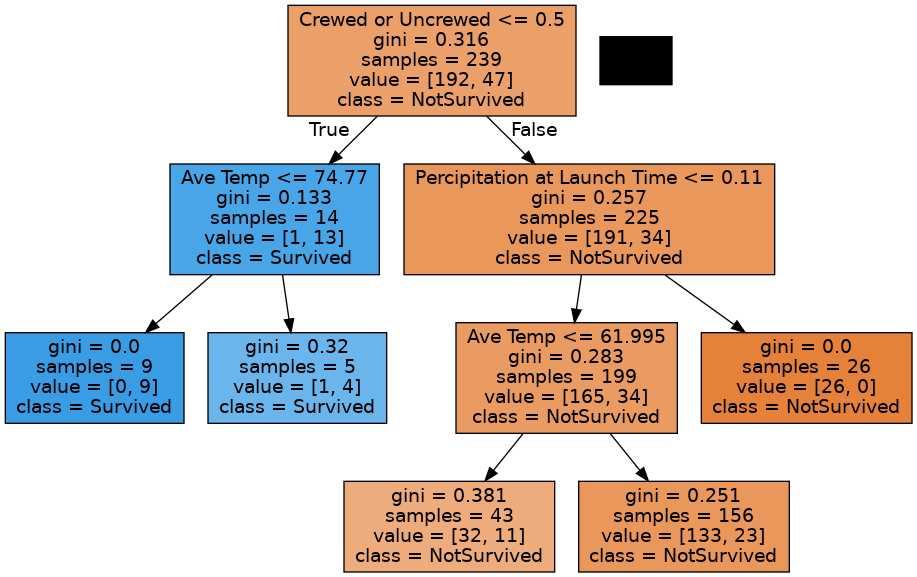

In [25]:
tree_graph_to_png(tree=model, feature_names=X.columns.values, class_names=['NotSurvived', 'Survived'], png_file_to_save='decision_tree.png')

In [26]:
pd.crosstab(y_test, y_pred, margins=True) 

col_0,N,Y,All
Launched?,,,
N,49,0,49
Y,9,2,11
All,58,2,60


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  0]
 [ 9  2]]


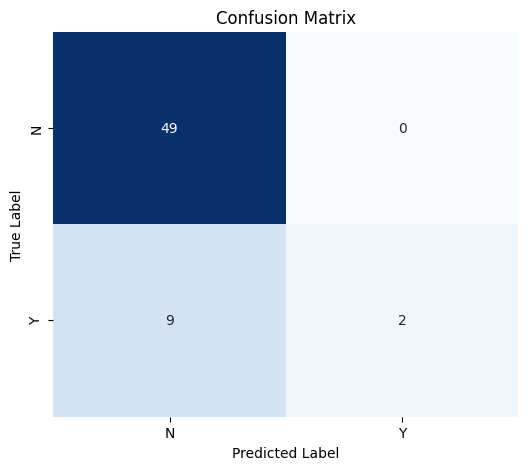

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=df['Launched?'].unique(), yticklabels=df['Launched?'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_pred)

0.85

In [39]:
# 혼돈행렬 지표 정밀도 재현율 f1점수
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.84      1.00      0.92        49
           Y       1.00      0.18      0.31        11

    accuracy                           0.85        60
   macro avg       0.92      0.59      0.61        60
weighted avg       0.87      0.85      0.80        60



### 그리드 서치

In [41]:
# CV 
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_acc = cross_val_score(model, X_train, y_train, cv=3)
cross_acc

array([0.85      , 0.8625    , 0.84810127])

In [42]:
param_grid = {'max_depth' : [3, 5, 7], 'min_samples_split' : [2, 3, 4]}
gr_search = GridSearchCV(DecisionTreeClassifier(random_state=12), param_grid=param_grid, cv=3)
gr_search

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]})

In [43]:
gr_search.fit(X, y)
gr_search

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4]})

In [44]:
gr_search.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [45]:
gr_search.best_score_

0.8026599326599326

### 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8333333333333334

### 로지스틱 회귀

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.85